### KNN-classification_1, I will use Mammographic (https://github.com/MachineLearningBCAM/Datasets/tree/main/data/binary_class_datasets).A cleaned version of this dataset is also available on Kaggle: (https://www.kaggle.com/datasets/overratedgman/mammographic-mass-data-set/data). I will use the uncleaned one. The dataset contains 959 rows and 6 columns. The target variable "Severity" is balanced, making it suitable for use with the KNN algorithm.

### 

In [104]:
# usual imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline

# since we're doing KNN-classification:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [105]:
# load data 
df = pd.read_csv("Mammographic.csv")

In [106]:
# let's take a look at the data
# two first columns don't have names
df.head()

,,961,5,begnin,malignant
5.0,67.0,3.0,5.0,3.0,1
4.0,43.0,1.0,1.0,NaN,1
5.0,58.0,4.0,5.0,3.0,1
4.0,28.0,1.0,1.0,3.0,0
5.0,74.0,1.0,5.0,NaN,1


In [107]:
# first I will rename the columnss: 
df = pd.read_csv("mammographic.csv", skiprows=1, header=None)
df.columns = ["BI-RADS", "Age", "Shape", "Margin", "Density", "Severity"]

In [108]:
df.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [109]:
df.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [110]:
# checking for missing values
df.isna().sum()

BI-RADS      2
Age          5
Shape       31
Margin      48
Density     76
Severity     0
dtype: int64

In [111]:
# for simplicity, I will drop the rows with missing values:
df = df.dropna()

In [112]:
df.isna().sum()

BI-RADS     0
Age         0
Shape       0
Margin      0
Density     0
Severity    0
dtype: int64

In [113]:
# we still have enouth data to work with:
len(df)

830

In [114]:
# there are floar and int values, all is numeric but i will convert all to int.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 0 to 960
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BI-RADS   830 non-null    float64
 1   Age       830 non-null    float64
 2   Shape     830 non-null    float64
 3   Margin    830 non-null    float64
 4   Density   830 non-null    float64
 5   Severity  830 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 45.4 KB


In [115]:
df = df.astype(int)

In [116]:
df.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
8,5,57,1,5,3,1
10,5,76,1,4,3,1


In [117]:
# checking "age" variable:
df["Age"].value_counts()

Age
67    30
59    29
66    28
57    27
46    25
      ..
88     1
93     1
26     1
18     1
20     1
Name: count, Length: 72, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

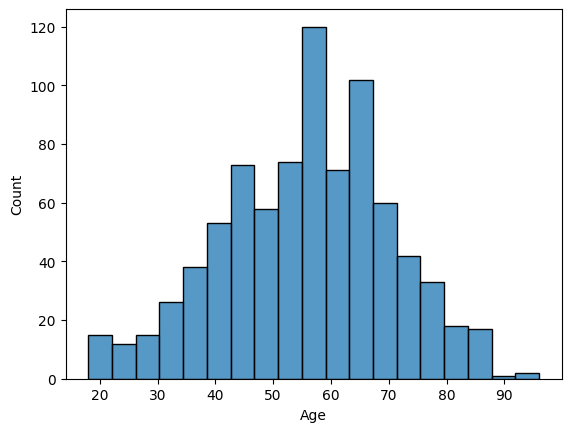

In [118]:
#distribution of "Age" variable is normal:
sns.histplot(df['Age'])

In [119]:
# checking the target variable "Severity":
# It is balanced, with 0 and 1 being the two classes. (0 = benign, 1 = malignant)
df["Severity"].value_counts()

Severity
0    427
1    403
Name: count, dtype: int64

In [120]:
# BI-RADS variable:
# We can see that the values 4 and 5 are the most frequently represented. For the model lower values can be important, 
# i will check if this variable correlate with the target variable.
df["BI-RADS"].value_counts()

BI-RADS
4     468
5     316
3      24
6       9
2       7
0       5
55      1
Name: count, dtype: int64

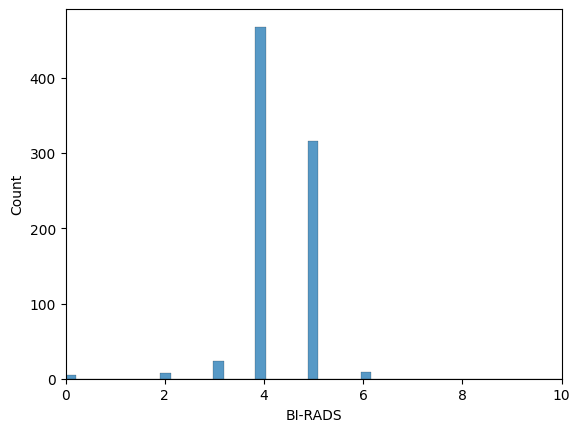

In [121]:
import matplotlib.pyplot as plt

sns.histplot(df['BI-RADS'])
plt.xlim(0, 10) 
plt.show()


<Axes: xlabel='Shape', ylabel='Count'>

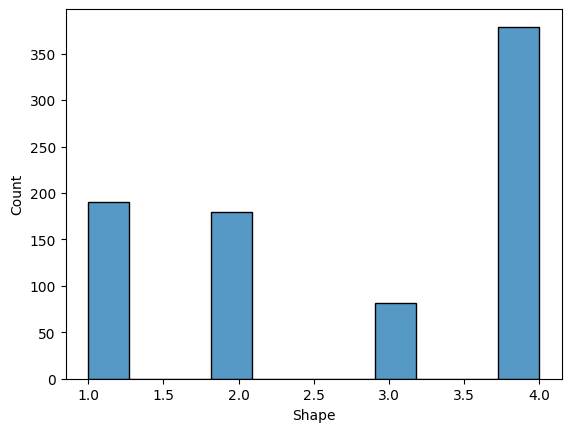

In [ ]:
# checking "Shape" variable:
# Value 4 is the most frequent
sns.histplot(df['Shape'])

<Axes: xlabel='Margin', ylabel='Count'>

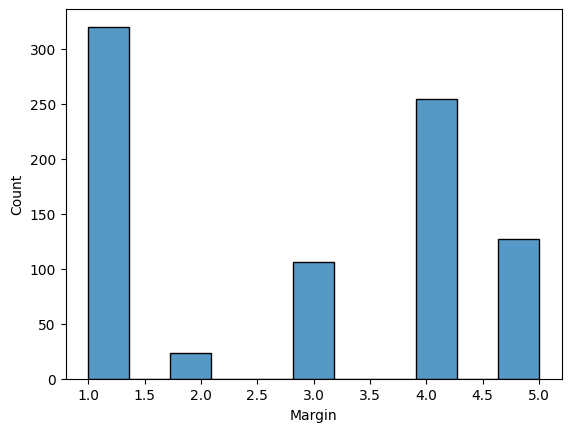

In [ ]:
#Margin variable:
# value 2 is the least frequent
sns.histplot(df['Margin'])

<Axes: xlabel='Density', ylabel='Count'>

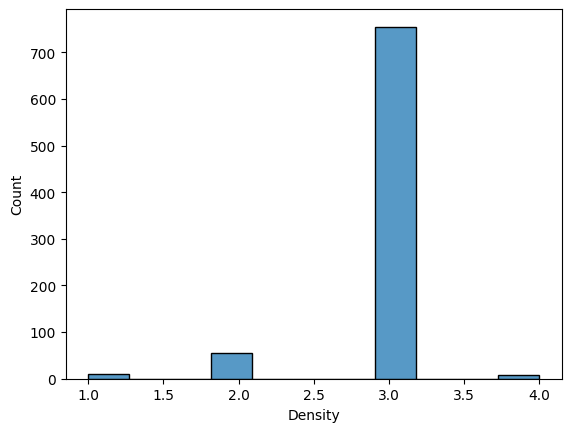

In [124]:
# for the "Density" variable we can see that value 3 is stays out of all the others:
sns.histplot(df['Density'])

<Axes: >

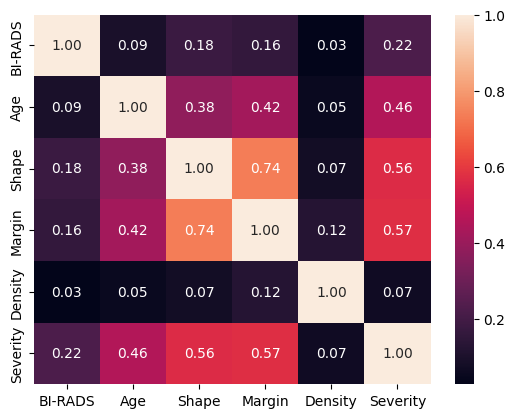

In [125]:
# on this correlation matrix we can see the most important supported variables:
# "Shape" and  "Margin". "Density" has very poor correlation with the target variable, so we can drop this column. 
# Also, we can keep the "BI-RADS" variable but consider dropping it later.
ions = df.corr(numeric_only=True)
sns.heatmap(correlations, annot=True, fmt='.2f')

In [126]:
# dropping the "Density" column:
df = df.drop(columns=["Density"])

###  X/y -split

In [127]:
# a small trick => use everything else except, the target
X = df.drop("Severity", axis=1)

# our target variable is y
y = df['Severity']

### Train/test -split, train model, metrics etc.

In [128]:
# create train/test split with scikit-learn's helper function
# random_state is optional, you can lock down the randomness for same results everytime
# this is sometimes helpful when you want to minimize randomness in order to maximize optimizations

# it seems we get pretty good classification result with random state = 24 in the train/test -split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

### Find the optimal k-value for this data

Based on iterations, best k-value is this:
5


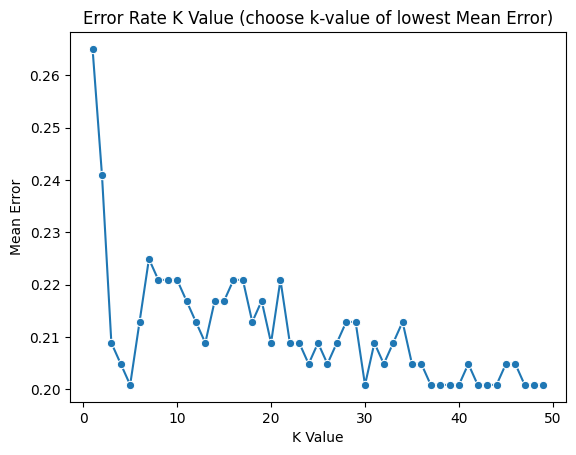

In [129]:
# CLASSIFIER VERSION
# adjust this to 50 or even 150 if you have lots of data rows
max_iterations = 50

# list to save the error values in the loop
error = []

# the default metric in scikit-learn
metric_selection = "cosine"
weight_selection = 'uniform'

# Calculating error for K values between 1 and 40
for i in range(1, max_iterations):

     # try with current k-value, train the model and make a test prediction
    knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=i, weights=weight_selection, metric=metric_selection))
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)

    # save the error value for this k-value
    error.append(np.mean(pred_i != y_test))
    
# plot all the k-values and their error values
sns.lineplot(x=range(1, max_iterations), y=error, marker='o')
plt.title('Error Rate K Value (choose k-value of lowest Mean Error)')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# choose best k-value based on metrics
# we have to add +1 to k-value, since argmin() returns an index
# which starts from 0, but k-values start from 1
print("Based on iterations, best k-value is this:")
k_value = np.argmin(error) + 1
print(k_value)

###  Create logistic regression model

In [130]:
# # code as usual
# model = LogisticRegression()
# model.fit(X_train, y_train)

# build the model with the optimal values
model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k_value, metric=metric_selection))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='cosine'))])

###  Classification error metrics

In [131]:
# get the test predictions for metrics as usual
predictions = model.predict(X_test)

In [132]:
# print the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

# with some tweaking with the random_state of the train/test split
# and distance metrics and weights, we got a nice 85% accuracy fairly quickly

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       126
           1       0.81      0.78      0.79       123

    accuracy                           0.80       249
   macro avg       0.80      0.80      0.80       249
weighted avg       0.80      0.80      0.80       249


Model overall accuracy: 79.92%


[[103  23]
 [ 27  96]]


<Axes: >

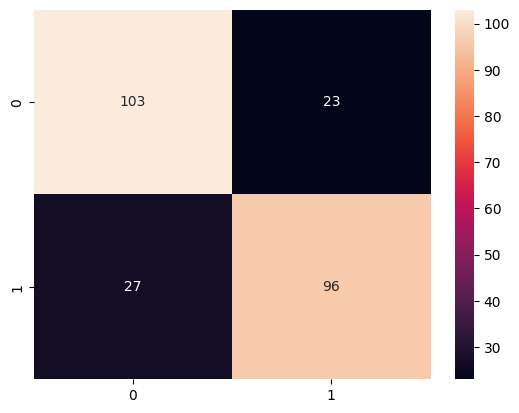

In [133]:
print(confusion_matrix(y_test, predictions))

# if you want a more graphical version of this, try:
# the fmt-parameter will change to decimal format from scientific format
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g')

In [134]:
# The AUC score is a super sensitive metric
# you often get low scores, even 0.5

# in binary logistic regression, AUC values are often interpreted as follows:
# A binary classifier is useful only when it achieves ROC-AUC score greater than 0.5 and as near to 1 as possible. 
# If a classifier yields a score less than 0.5, it simply means that the model is performing worse 
# than a random classifier, and therefore is useless.

# In multinomial logistic regression , AUC values are often interpreted as follows: 
# 0.5-0.6 (failed)
# 0.6-0.7 (worthless)
# 0.7-0.8 (poor)
# 0.8-0.9 (good)
# > 0.9 (excellent)

# basically 0.5 means, there's still something to optimize
# if this falls under 0.5, random guessing works better than this model
roc_auc_score(y, model.predict_proba(X.values)[:, 1])

c:\Users\svetl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0.9134855097308826